train loss:2.3001785673069093
=== epoch:1, train acc:0.209, test acc:0.193 ===
train loss:2.2994828682471753
train loss:2.2970731335107035
train loss:2.291759404096423
train loss:2.2836506870345437
train loss:2.2740138945849746
train loss:2.262949566312133
train loss:2.24810522952126
train loss:2.233529958549748
train loss:2.1994407830483342
train loss:2.1786550284586563
train loss:2.1711855232805366
train loss:2.11371516443357
train loss:2.082764949920744
train loss:1.9915094697226863
train loss:1.9841812309278375
train loss:1.8854629406805006
train loss:1.7954317636591026
train loss:1.7579304325873668
train loss:1.6616766399442309
train loss:1.571317574539346
train loss:1.5330718911285972
train loss:1.4408752802085525
train loss:1.3870965829766684
train loss:1.2240818445948705
train loss:1.2672546205540969
train loss:1.3394801198306288
train loss:1.0244372451901302
train loss:0.9934456298827729
train loss:1.0361473073315874
train loss:1.0532447866528292
train loss:0.8114963264592717


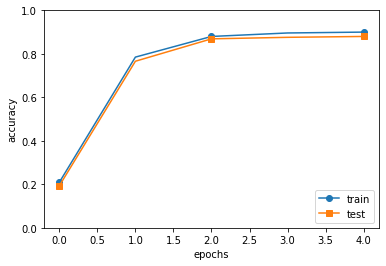

In [1]:
%matplotlib inline
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減 
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 5 #20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# パラメータの保存
network.save_params("params.pkl")
print("Saved Network Parameters!")

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [ ]:
##これまでの課題と合わせて、CNNの仕組みを理解することができた。また、適切に実装を行った場合に、損失関数が減少して行く様子を確認することが出来た。